# Reading and writing numpy arrays to wav files for sound playback.

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [16]:
def synthetic(name, T, rate, base_freq = 1000):
    """Create a synthetic signal.
    """
    valid_names = set(['tone', 'chirp', 'laser'])
    
    nsamples = int(round(rate*T))
    t = np.linspace(0, T, nsamples)

    if name == 'tone':
        # A simple tone with just one frequency
        y = np.sin(2*np.pi*base_freq*t)
    elif name == 'chirp':
        # a chirp
        freq = base_freq*t
        y = np.sin(2*np.pi*freq*t)
    elif name == 'laser':
        # a 'laser': 1/t frequency shift
        freq = base_freq/(t+1)
        y = np.sin(2*np.pi*freq*t)

    # linearly rescale raw data to wav range and convert to integers
    scale_fac = 2**15
    sound = (scale_fac*y).astype(np.int16)
    return sound

In [17]:
def viz_sound(sound, name, npts=1000):
    """Visualize the structure of an audio signal.
    """
    f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,4))
    ax0.plot(sound[:npts])
    ax1.specgram(sound)

Generate a synthetic signal

In [18]:
rate = 2*11025 # Hz
T = 2 # s
base_freq = 1000
name = 'tone'
name = 'chirp'
name = 'laser'
sound = synthetic(name, T, rate)

We can write it to a file on disk in case we'd like to play it with system utilities

In [26]:
fname = 'sample_%s.wav' % name
wavfile.write(fname, rate, sound)

But we can visualize it and play it directly in the browser, using matplotlib and IPython's Audio objects that take advantage of HTML5's audio capabilities:

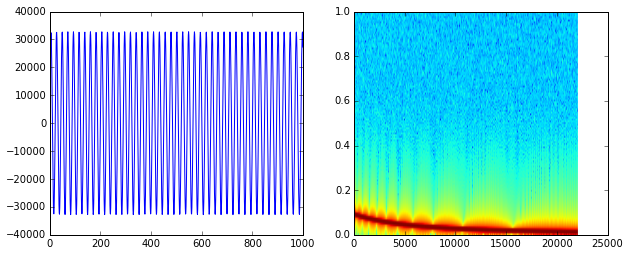

In [30]:
viz_sound(sound, name)

In [31]:
from IPython.display import Audio
Audio(sound, rate=rate)